# Diamonds Data Analysis

#### Objective

**Analysing the different factors and  key variables that effect the price of a diamond.**

#### Dataset:- 

**This dataset contains detailed information about over 6400 diamonds, including their physical measurements (like length, width, height, and carat weight), quality characteristics (such as cut, color, clarity, and fluorescence), and pricing. It also includes attributes like certification type, proportions, and symmetry, making it a great resource for analyzing how various factors influence diamond prices.**

**Install necessary libraries**

In [4]:
!pip install mysql-connector-python

**import necessary libraries**

In [55]:
import mysql.connector
import pandas as pd
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as plt

##### Mysql Conection

In [2]:

# Connect to the MySQL server
connection = mysql.connector.connect(
    host="127.0.0.1",       # Replace with your MySQL host
    user="root",   # Replace with your MySQL username
    password="159357", # Replace with your MySQL password
    database="csv_tables"  # Replace with your database name
)

# Check the connection
if connection.is_connected():
    print("Connected to MySQL Database")




Connected to MySQL Database


##### Fetch data using query

In [3]:
cursor = connection.cursor(buffered=True)

# Execute the query
query = "SELECT * FROM Diamond_Online_Marketplace;"
cursor.execute(query)

# You can directly iterate over the buffered cursor
rows = cursor.fetchall()


In [4]:
# Get column names from the cursor description
columns = [desc[0] for desc in cursor.description]

# Create a Pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

# Close the cursor and connection
cursor.close()
connection.close()

# Display the first few rows of the DataFrame
print(df.head())

              Shape    Cut Color Clarity  Carat Weight  Length/Width Ratio  \
0  Cushion Modified  Ideal     F    VVS2          1.84                1.02   
1              Pear            E     VS1          1.20                1.65   
2              Oval            E     VS1          1.19                1.41   
3             Heart            D      IF          1.00                1.18   
4           Radiant            H     VS1          1.01                1.35   

   Depth %  Table %     Polish   Symmetry                        Girdle Culet  \
0     65.8       59  Excellent  Very Good               Medium to Thick  None   
1     62.5       58  Very Good  Very Good               Medium to Thick  None   
2     63.1       63  Very Good  Very Good               Medium to Thick  None   
3     61.7       58  Excellent  Excellent  Slightly Thick to Very Thick  None   
4     69.4       66  Excellent  Very Good                         Thick  None   

   Length  Width  Height  Price           Ty

In [5]:
print(df)

# Close the connection
cursor.close()
connection.close()

                 Shape    Cut Color Clarity  Carat Weight  Length/Width Ratio  \
0     Cushion Modified  Ideal     F    VVS2          1.84                1.02   
1                 Pear            E     VS1          1.20                1.65   
2                 Oval            E     VS1          1.19                1.41   
3                Heart            D      IF          1.00                1.18   
4              Radiant            H     VS1          1.01                1.35   
...                ...    ...   ...     ...           ...                 ...   
6460              Pear            F     VS2          1.02                1.54   
6461             Heart            E    VVS2          1.00                1.16   
6462          Princess  Ideal     G    VVS1          1.03                1.01   
6463           Radiant            E     VS1          1.06                1.43   
6464           Emerald            H    VVS1          1.00                1.36   

      Depth %  Table %     

In [6]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6465 entries, 0 to 6464
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6465 non-null   object 
 1   Cut                 6465 non-null   object 
 2   Color               6465 non-null   object 
 3   Clarity             6465 non-null   object 
 4   Carat Weight        6465 non-null   float64
 5   Length/Width Ratio  6465 non-null   float64
 6   Depth %             6465 non-null   float64
 7   Table %             6465 non-null   int64  
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6465 non-null   object 
 11  Culet               6465 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6465 non-null   int64  
 16  Type  

In [7]:
# drop duplicates rows

df = df.drop_duplicates(keep=False)

In [8]:
df.describe()

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price
count,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000
mean,1.234121,1.329786,64.211705,61.833256,7.663301,6.096241,3.884704,3526.910203
std,0.504872,0.325706,4.774388,4.760986,1.675256,1.149051,0.598589,3276.402602
min,1.000000,1.000000,46.100000,51.000000,5.180000,4.420000,2.670000,1010.000000
25%,1.010000,1.020000,61.200000,58.000000,6.330000,5.390000,3.460000,1210.000000
50%,1.030000,1.270000,63.100000,61.000000,7.420000,5.640000,3.670000,3320.000000
75%,1.190000,1.510000,67.600000,65.000000,8.655000,6.585000,4.100000,4390.000000
max,9.380000,2.580000,77.000000,78.000000,15.210000,14.880000,8.170000,39460.000000


##### Data Analysis

###### Most color type diamonds

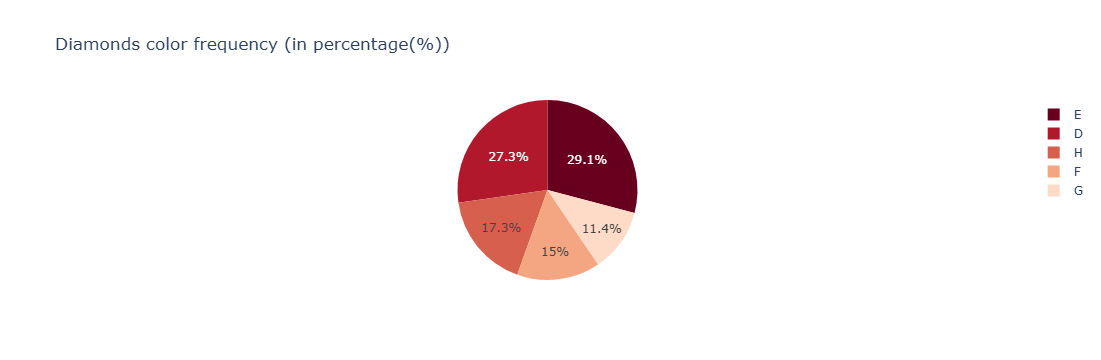

In [42]:
# Create a pie chart
fig = px.pie(df1, 
             names="Color", 
             values="Frequency", 
             title="Diamonds color frequency (in percentage(%))", 
             color_discrete_sequence=px.colors.sequential.RdBu)

# Show the plot
fig.show()

**Key findings:-** color D(27.3%) and color E(29.1%) type diamonds are more in the marketplace.

###### Shape-vise diamonds frequency


Frequency of diamonds shape-vise:
               Shape  Frequency
9              Round        881
6               Pear        840
4           Marquise        833
7           Princess        833
5               Oval        826
3              Heart        823
8            Radiant        797
1   Cushion Modified        363
2            Emerald        137
0            Cushion         91
10    Square Radiant         35


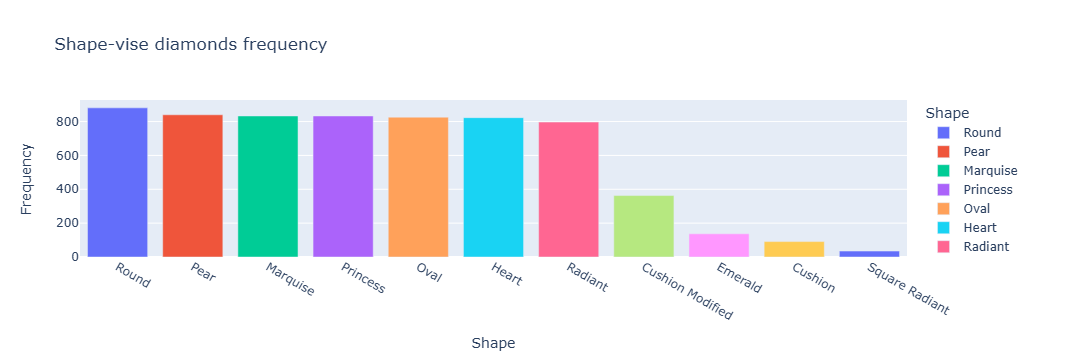

In [26]:
df1 = df.groupby(["Shape"]).size().reset_index(name="Frequency").sort_values("Frequency",ascending=False)
print("\nFrequency of diamonds shape-vise:")
print(frequency)





# Create a bar graph
fig = px.bar(df1, x="Shape", y="Frequency", title="Shape-vise diamonds frequency", color="Shape", )

# Show the plot
fig.show()

**Key findings:-** Square Radiant and cushion shape type diamonds are less in marketplace.

###### Polish-vise average price of diamonds

In [22]:
df1 = df.groupby(["Polish"])[["Price"]].mean().reset_index().sort_values("Price")
print("polsih-vise average price of diamonds:")
print(df1)

polsih-vise average price of diamonds:
      Polish        Price
0  Excellent  3395.935109
2  Very Good  4765.853659
1       Good  8453.823529


###### Girdle-vise diamonds frequency

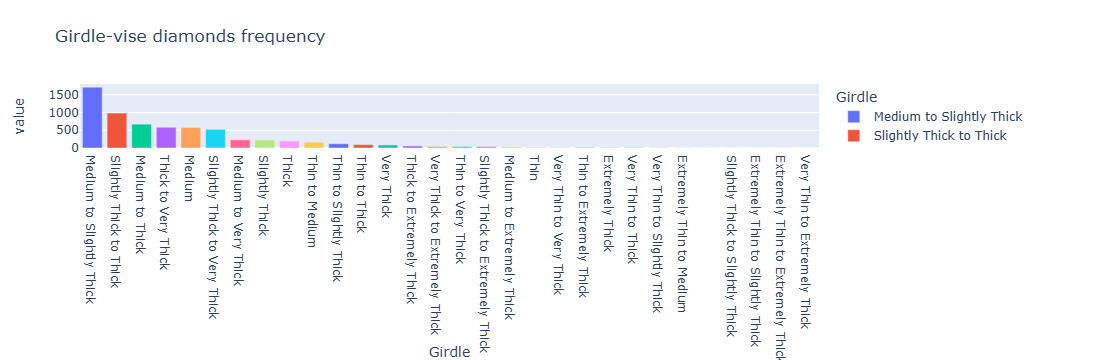

In [38]:
df1 = df.groupby(["Girdle"]).size().reset_index(name='value').sort_values("value",ascending=False)


# Create a bar graph
fig = px.bar(df1, x="Girdle", y="value", title="Girdle-vise diamonds frequency", color="Girdle", )

# Show the plot
fig.show()


###### Girdle-vise average price of diamonds 

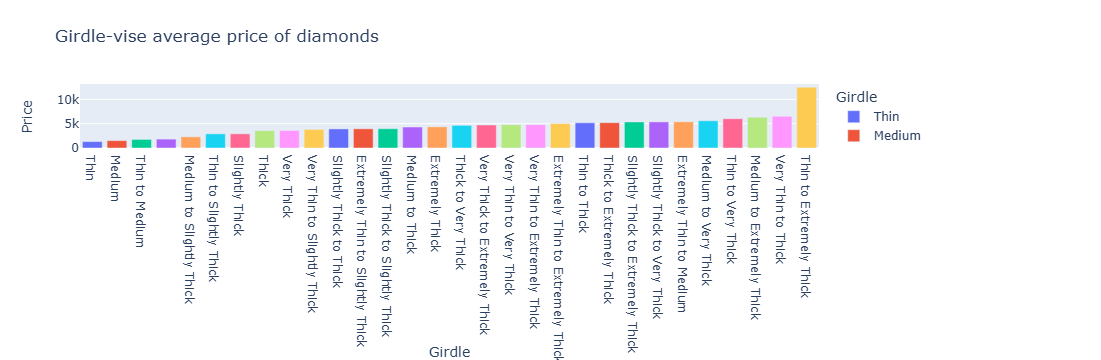

In [37]:
df1 = df.groupby(["Girdle"]).size().reset_index(name='value').sort_values("value",ascending=False)



df1 = df.groupby(["Girdle"])[["Price"]].mean().reset_index().sort_values("Price")



# Create a bar graph
fig = px.bar(df1, x="Girdle", y="Price", title="Girdle-vise average price of diamonds", color="Girdle", )

# Show the plot
fig.show()


**Key findings:-** Medium to slightly thick Girdle type diamonds are most common.  

#### Correlation Analysis

##### Label encoding

In [51]:
from sklearn.preprocessing import LabelEncoder



# Initialize the encoder
label_encoder = LabelEncoder()



# function to encode object/non-numeric columns

def LabelEncoding(column):


    # check for object columns only
 if(column.dtype=='object'):
     
    # Fit and transform the data
    encoded_labels = label_encoder.fit_transform(column)

     # return encoded columns
    return encoded_labels

    
 else:

     # return numeric columns
    return column


# apply the function
df= df.apply(LabelEncoding)

##### HeatMap Visulization

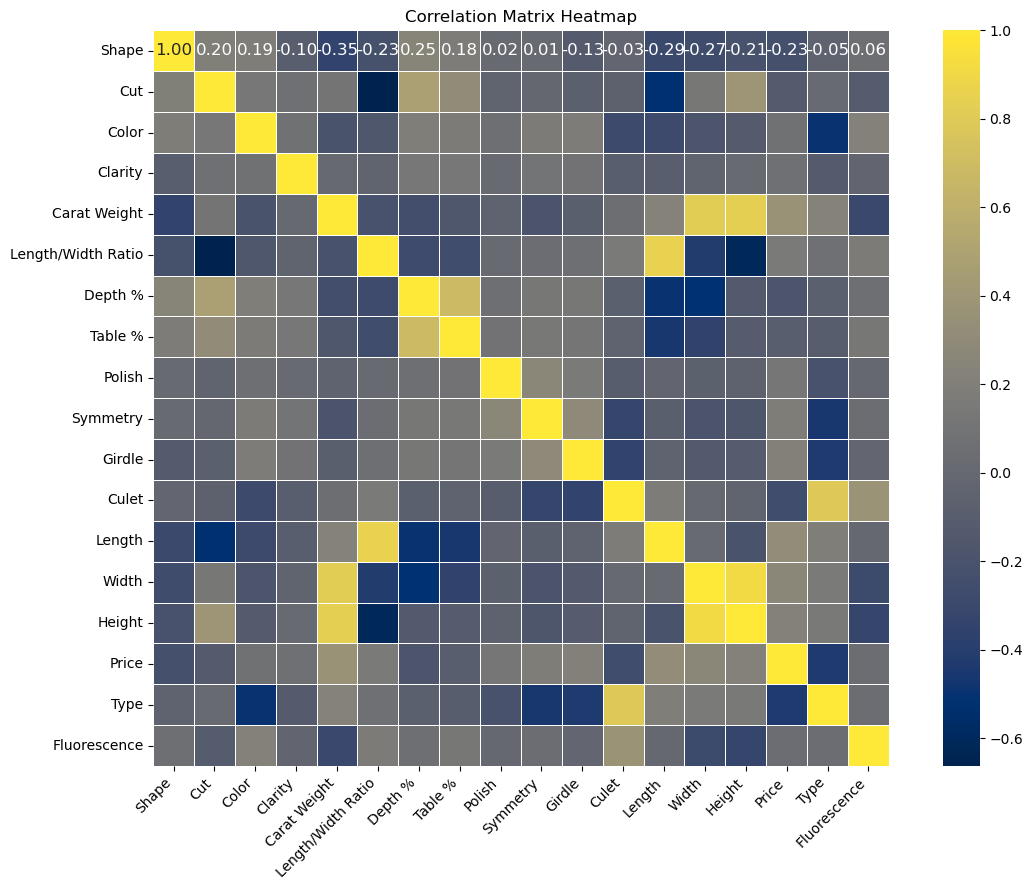

In [67]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 9))
sb.heatmap(correlation_matrix, annot=True, cmap="cividis", fmt=".2f", square=True,linewidths=0.5,annot_kws={"size": 12})
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()                   
plt.show()

**Key findings:-**   between the price and other variables there are  some positive correlationship not strong relationship like carat weight(.5),polish (.4),symmetry, girdle,length,width,height.also multcolinearity between some variables.

#### Price Distributions

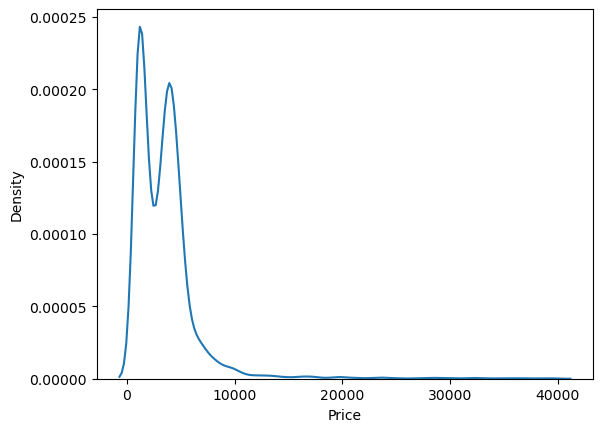

In [71]:
# kdeplot for density distributions
sb.kdeplot(df['Price'])
# Show the plot
plt.show()

**Conclusion:-**  

In correation cofficints analysis we found that some features impact positively on price.Round,pear,princess,oval,heart shape type diamonds are most commons.